In [1]:
import numpy as np

import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [ ]:
!pip install opencv-python

# Utility Functions
functions to help you run the notebook more easily

In [2]:
def show_image(image):
    plt.imshow(image)
    plt.show()

# Load the image

In [3]:
!wget https://s.yimg.com/os/creatr-uploaded-images/2020-12/efdcee80-4a1e-11eb-b86e-d6004b63973a -O data/sample_image.jpg
!wget https://www.iti.gov.eg/assets/images/iti-logo.png -O data/iti_logo.jpg    

--2021-10-29 23:11:07--  https://s.yimg.com/os/creatr-uploaded-images/2020-12/efdcee80-4a1e-11eb-b86e-d6004b63973a
Resolving s.yimg.com (s.yimg.com)... 87.248.118.23, 87.248.118.22
Connecting to s.yimg.com (s.yimg.com)|87.248.118.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4523100 (4.3M) [image/jpeg]
Saving to: ‘data/sample_image.jpg’

data/sample_image.j 100%[===================>]   4.31M  1.79MB/s    in 2.4s    

2021-10-29 23:11:10 (1.79 MB/s) - ‘data/sample_image.jpg’ saved [4523100/4523100]

--2021-10-29 23:11:10--  https://www.iti.gov.eg/assets/images/iti-logo.png
Resolving www.iti.gov.eg (www.iti.gov.eg)... 41.33.119.71
Connecting to www.iti.gov.eg (www.iti.gov.eg)|41.33.119.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15813 (15K) [image/png]
Saving to: ‘data/iti_logo.jpg’

data/iti_logo.jpg   100%[===================>]  15.44K  --.-KB/s    in 0s      

2021-10-29 23:11:10 (160 MB/s) - ‘data/iti_logo.jpg’ saved [15

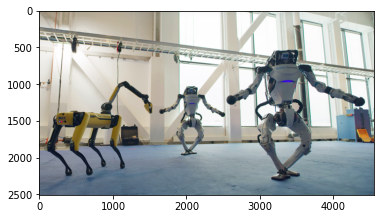

In [7]:
# load and show image 
image = cv2.imread('data/sample_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #why this line ?
show_image(image)

# Check Image Properties
- The loaded image is a numpy array.
- img.shape indicates the number of pixels with three channels (since this is a RGB color image). 
- If the image is gray-scale, image shape contains only number of rows and columns.
- The data type of the image is uint8, i.e., 8 bit unsigned int (numbers from 0 to 255) as indicated by img.dtype.
- Minimum and maximum number in the matrix can be checked using the min and max functions.
- Total number of pixels can be obtained by img.size

In [6]:
print(type(image.shape))
print('image.shape', image.shape)
print('image.dtype', image.dtype) # 8 bit unsigned int (numbers from 0 to 255) as indicated by img.dtype.
print('image.min', image.min())
print('image.max', image.max())
print('image.size', image.size)

<class 'tuple'>
image.shape (2505, 4555, 3)
image.dtype uint8
image.min 0
image.max 255
image.size 34230825


# Show image pixel sample

In [7]:
# show 10x10 chunk of the first layer
image[0:10,0:10,0]

array([[145, 145, 144, 142, 142, 144, 151, 153, 156, 159],
       [142, 144, 143, 141, 145, 146, 150, 154, 156, 158],
       [145, 149, 147, 148, 149, 149, 149, 155, 155, 156],
       [145, 147, 149, 148, 150, 150, 151, 153, 151, 151],
       [148, 147, 150, 152, 153, 154, 155, 152, 148, 147],
       [148, 148, 148, 152, 152, 155, 153, 150, 147, 144],
       [150, 148, 149, 150, 153, 152, 153, 148, 146, 144],
       [151, 149, 149, 151, 150, 149, 149, 145, 146, 145],
       [154, 157, 153, 153, 153, 152, 149, 146, 144, 141],
       [154, 153, 153, 154, 156, 153, 149, 142, 141, 142]], dtype=uint8)

# Resize the image

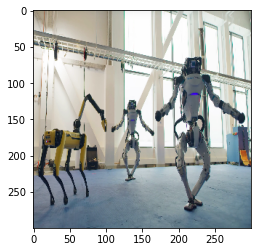

In [8]:
# resize image naievly
image_resized = cv2.resize(image, (300, 300))
show_image(image_resized)

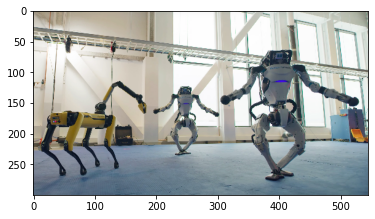

In [9]:
# resize keeping aspect ratio
h = 300
w = int(h*image.shape[1]/image.shape[0])
image_resized = cv2.resize(image, (w, h))
show_image(image_resized)

# Crop the image

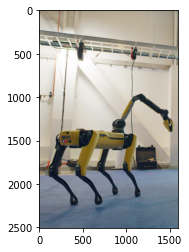

In [10]:
# crop the yellow robot
cropped_image = image[:,:1600,:]
show_image(cropped_image)

# Writing and drawing

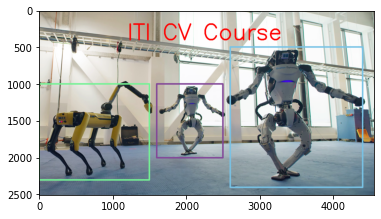

In [11]:
# write ITI CV Course on the top center of the image
image_draw = image.copy()



image_draw = cv2.putText(image_draw, 'ITI CV Course', (1200, 400),
                           cv2.FONT_HERSHEY_SIMPLEX, 
                   10, (255,0,0), 20, cv2.LINE_AA)
# draw a different color box on each robo

coords = [((0,1000),(1500,2300)),
         ((1600,1000),(2500,2000)),
         ((2600,500),(4400,2400))]
for top, bot in coords:
    color = np.random.randint(0,255,3).tolist()
    image_draw = cv2.rectangle(image_draw, top, bot, color, 20)


show_image(image_draw)

# Overlay an image

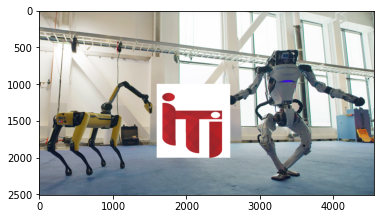

In [11]:
# load iti logo
logo = cv2.imread('data/iti_logo.jpg')
logo = cv2.cvtColor(logo, cv2.COLOR_RGB2BGR)

# resize logo to 300x300
w = 1000
h = 1000
x_offset = 1600
y_offset = 1000
logo_resized = cv2.resize(logo, (w, h))
# overlay image
overlayed_image = image.copy()
overlayed_image[y_offset:y_offset+h,x_offset:x_offset+w] = logo_resized
# overlayed_image = cv2.addWeighted(image, 1, logo, 0.5, 0.0)
show_image(overlayed_image)

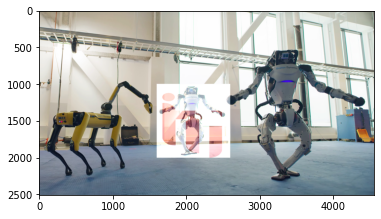

In [12]:
# overlay image
overlayed_image = image.copy()
overlay_weighted_section = overlayed_image[y_offset:y_offset+h,x_offset:x_offset+w]
overlay_weighted_section = cv2.addWeighted(overlay_weighted_section, 1, logo_resized, 0.5,1)
overlayed_image[y_offset:y_offset+h,x_offset:x_offset+w] = overlay_weighted_section
# overlayed_image = cv2.addWeighted(image, 1, logo, 0.5, 0.0)
show_image(overlayed_image)